## Aufgabe 1 (Lineare Ausgleichsrechnung)

In [1]:
import numpy as np
from math import *
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
import scipy.linalg as spl
import scipy.interpolate as spi
import random as rd
import matplotlib.pyplot as plt
from sympy import *
import sympy as sym
sym.init_printing()
from IPython.display import display, Math
import pandas as pd

In [2]:
x = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
y = np.array([5.1, 7.8, 7.1, 7.4, 9.4, 8.4, 8.9, 6.2, 4.7, 3.3, 0.6])
n = 3

a = np.array(list(map(lambda x: x ** 2, x))).reshape(len(x), 1)
a = np.append(a, np.array(list(map(lambda x: x, x))).reshape(len(x), 1), axis=1)
a = np.append(a, np.array(list(map(lambda x: 1, x))).reshape(len(x), 1), axis=1)

aT = np.transpose(a)
le = np.matmul(aT, a)
re = np.matmul(aT, y).reshape(3, 1)

In [3]:
N = Matrix(le)
r = Matrix(re)
a = Matrix(a)
aT = Matrix(aT)
l1, l2, l3,la = symbols("λ1 λ2 λ3 λ")
E = list(linsolve((N, r), [l1, l2, l3]))[0]
y_fun = lambda x: E[0] * (x ** 2) + E[1] * x + E[2]
l = Matrix([l1,l2,l3])
E

In [18]:
display(Math('\ \\text{  A = } %s   \\text{  AT = } %s ' % (sym.latex(sym.simplify(a)) , (sym.latex(sym.simplify(aT)))  ))   )

<IPython.core.display.Math object>

In [19]:
display(Math('\ \\text{  }%s   \\text{*} %s \\text{= } %s' % (sym.latex(sym.simplify(N)) , (sym.latex(sym.simplify(l))), (sym.latex(sym.simplify(r)))  ))   )

<IPython.core.display.Math object>

In [20]:
En = (linsolve((N, r), [l1, l2, l3]))
display(Math('\ \\text{   %s = }{%s}  ' % ('l',sym.latex(sym.simplify(En))  ))   )

<IPython.core.display.Math object>

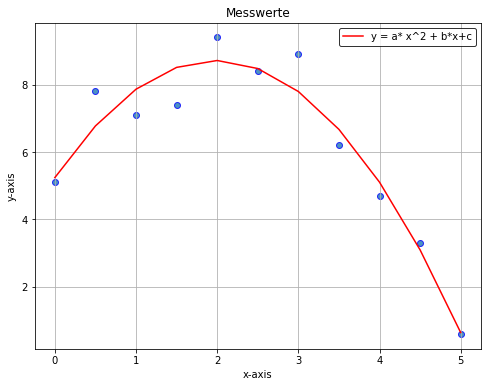

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.8,edgecolor='b')
plt.title('Messwerte')
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.grid()
plt.plot(x, y_fun(x), "-r", label="y = a* x^2 + b*x+c")
ax = plt.gca()
plt.legend(loc='best',edgecolor="k")
plt.show()

## Aufgabe 2 (Polynominterpolation vs. lineare Regression)

In [22]:
groesse = np.array([1.55, 1.57, 1.62, 1.68, 1.75, 1.76, 1.81, 1.83,1.87, 1.89, 1.90, 1.92, 1.95, 1.96, 1.99, 2.02])
gewicht = np.array([ 51,   50,   55,   52,   60,   68,   78,   91,84,   81,   90,  105,   95,   99,  100,  101])
daten = list(zip(groesse,gewicht))

In [23]:
def ziehe_acht(daten):
    sample = rd.sample(daten,8)
    sample2=[i for i in daten if i not in sample]
    gr_aus = []
    gew_aus = []
    gr_rest = []
    gew_rest = []
    for i in range(0,8):
        gr_aus.append(sample[i][0])
        gew_aus.append(sample[i][1])
        gr_rest.append(sample2[i][0])
        gew_rest.append(sample2[i][1])
        
    return gr_aus, gew_aus, gr_rest, gew_rest, sorted(list(zip(gr_aus,gew_aus))), sorted(list(zip(gr_rest,gew_rest)))

sample = ziehe_acht(daten)

In [24]:
def y_reg(sample,x,auswahl=True):
    if(auswahl):
        b, a, r, p, std = linregress(sample[0],sample[1])
        return a + b * x
    else:
        b, a, r, p, std = linregress(sample[2],sample[3])
        return a + b * x

x = np.array(sample[0])
y = np.array(sample[1])
y = y.reshape(len(y),1)

x_rest = np.array(sample[2])
y_rest = np.array(sample[3])
y_rest = y_rest.reshape(len(y_rest),1)

In [31]:
def vander_solve(x,y):
    V = np.vander(sorted(x),8,increasing=True)
    p = spl.solve(V, y)
    return p
def polynom(p,x):
    return sum([(p[i]*np.power(x,i)) for i in range(7,-1,-1)])

x_sort =[i[0] for i in sample[4] ]
y_sort =[i[1] for i in sample[4] ]

x_sort_r =[i[0] for i in sample[5] ]
y_sort_r =[i[1] for i in sample[5] ]

#Berechnung des Polynoms mit Hilfe der Vandermonte-Matrix
V = np.vander(x_sort,8,increasing=True)
p = spl.solve(V,y_sort)

V_rest = np.vander(x_sort_r,8,increasing=True)
p_rest = spl.solve(V_rest, y_sort_r)

p = np.array(p)
p_rest= np.array(p_rest)

V.shape

In [26]:
#Ausgabe Vandermonte-Matrix
a0,a1,a2,a3,a4,a5,a6 = symbols("a0 a1 a2 a3 a4 a5 a6")
P = Matrix(p)
V = Matrix(V)
Y = Matrix(y)
a = Matrix([a0,a1,a2,a3,a4,a5,a6 ])
display(Math(' \\text{V = } %s' % (sym.latex(sym.simplify(V))  ))   )

<IPython.core.display.Math object>

In [27]:
display(Math('\ \\text{  }%s   \\text{*} %s \\text{= } %s' %(sym.latex('V'), (sym.latex(sym.simplify(a))),
                                                            (sym.latex(sym.simplify(Y))))))

<IPython.core.display.Math object>

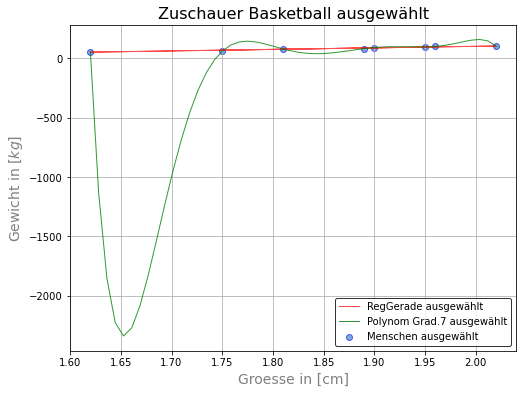

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(x,y,alpha=.6,edgecolor='b',label='Menschen ausgewählt')
x_ = np.linspace(min(x),max(x))

#Regressionsgerade der ausgewählten Datensätze
plt.plot(x,y_reg(sample,x,True),'r',alpha=0.7,label='RegGerade ausgewählt',linewidth=1)

#Polynom Grad 7 der ausgewählten Datensätze
plt.plot(sorted(x_),polynom(p,x_),'g',alpha=0.8,label='Polynom Grad.7 ausgewählt',linewidth=1)

plt.title('Zuschauer Basketball ausgewählt', fontsize=16, color='black')
plt.xlabel('Groesse in [cm]', fontsize=14, color='gray')
plt.ylabel('Gewicht in [$kg$]', fontsize=14, color='gray')
plt.legend(loc='best',edgecolor="k")
plt.grid(True)

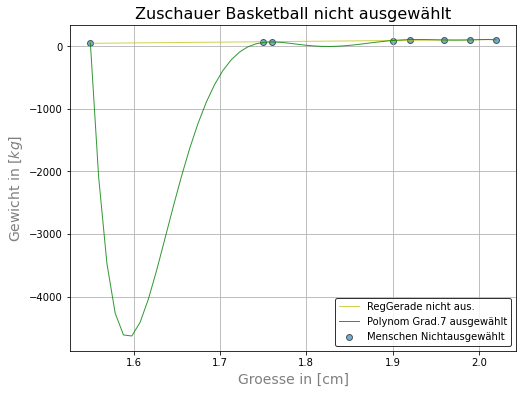

In [15]:
plt.figure(figsize=(8,6))
x_r = np.linspace(min(x_rest),max(x_rest))
plt.scatter(x_rest,y_rest,alpha=.6,edgecolor='k',label='Menschen Nichtausgewählt')
#Regressionsgerade der Nicht ausgewählten Datensätze
plt.plot(x_rest,y_reg(sample,x_rest,auswahl=False),'y',alpha=0.7,label='RegGerade nicht aus.',linewidth=1)
plt.plot(sorted(x_r),(polynom(p_rest,sorted(x_r))),'g',alpha=0.8,label='Polynom Grad.7 ausgewählt',linewidth=1)
plt.title('Zuschauer Basketball nicht ausgewählt', fontsize=16, color='black')
plt.xlabel('Groesse in [cm]', fontsize=14, color='gray')
plt.ylabel('Gewicht in [$kg$]', fontsize=14, color='gray')
plt.legend(loc='best',edgecolor="k")
plt.grid(True)

In [16]:
#Berechnung Summe der quadrierten Fehler
def e_f(f_x, y):
    e =  [ pow((y[i]-f_x[i]),2) for i in range(0,len(y))]
    return sum(e)


def vander_solve(x,y):
    V = np.vander(sorted(x),8,increasing=True)
    p = spl.solve(V, y)
    return p
def polynom(p,x):
    return sum([(p[i]*np.power(x,i)) for i in range(7,-1,-1)])
#Wir betrachten die Funktionen die über die Auswahl laufen
y = y
f_x_reg_a = (y_reg(sample,x,True))

f_x_pol_a = polynom(p,x_)  

#Hier die Funktionen des Restes
y_rest=y_rest
f_x_reg_re = y_reg(sample,x_rest,auswahl=False)
f_x_pol_re = polynom(p_rest,(x_r))   


labels=['Gerade Auswahl','Interpolationspolynom Auswahl','Gerade Rest','Interpolationspolynom Rest']
fehler=[e_f(f_x_reg_a,y),e_f(f_x_pol_a,y),e_f(f_x_reg_re,y_rest),e_f(f_x_pol_re,y_rest)]

In [17]:
# from sklearn.metrics import mean_squared_error
# mse=[mean_squared_error(f_x_reg_a,y),mean_squared_error(f_x_pol_a,y),mean_squared_error(f_x_reg_re,y_rest),mean_squared_error(f_x_pol_re,y_rest)]
for f in range(0,len(fehler)):
    display(Math('\ \\text{  E(g) Fehler %s = }{%s}  ' % (labels[f],sym.latex(sym.simplify(fehler[f]))  )) )
display(Math('\ \\text{   E(f) =  %s = }{%s}  ' % (labels[fehler.index(min(fehler))],sym.latex(sym.simplify(min(fehler))  )) ))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Aufgabe 3 (Logarithmisch-lineare Regression)

In [19]:
import math
x3 = np.array([ 1, 2, 4, 6,  8, 10,  12,  14 ])
y3 = np.array([ 1, 1, 3, 8, 21, 55, 144, 377 ])
log_y3 = list((map(lambda x:math.log(x),y3)))

In [20]:
l2v, l1v, r, p, std = linregress(x3,log_y3)
f_x = lambda x : np.power(e,l1v) * np.power(e,(l2v*x))

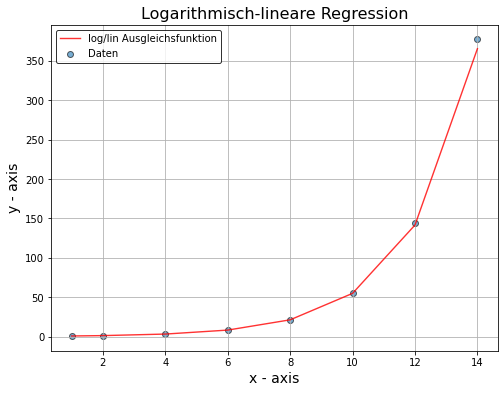

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(x3,y3,alpha=.6,edgecolor='k',label='Daten')

plt.plot(x3,f_x(x3),'r-',alpha=0.8,label='log/lin Ausgleichsfunktion',linewidth=1.4)
plt.title('Logarithmisch-lineare Regression', fontsize=16, color='black')
plt.xlabel('x - axis', fontsize=14)
plt.ylabel('y - axis', fontsize=14)
plt.legend(loc='best',edgecolor="k")
plt.grid(True)

In [22]:
l1, l2, e, x = symbols("λ1 λ2 e x")
expr = ( (e**l1v) * (e**(l2v*x)) )

d1 = pd.Series(x3,)
d2 = pd.Series(y3)
d3 = pd.Series(log_y3)
d1.name='xi'
d2.name='yi'
d3.name='log(yi)'
df = pd.concat([d1, d2, d3], axis=1)
df = df.T
df.columns = [''] * len(df.columns)
df

,,,,,,,,
xi,1.0,2.0,4.000000,6.000000,8.000000,10.000000,12.000000,14.000000
yi,1.0,1.0,3.000000,8.000000,21.000000,55.000000,144.000000,377.000000
log(yi),0.0,0.0,1.098612,2.079442,3.044522,4.007333,4.969813,5.932245


In [23]:
display(Math('%s = %s   \\quad %s = %s' %('l1',sym.latex(l1v),'l2',sym.latex(l2v))))

<IPython.core.display.Math object>

In [24]:
display(Math('f(x)= %s, \\quad = %s' %( sym.latex(expr),sym.latex(sym.simplify(expr)))))

<IPython.core.display.Math object>